In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
from scipy import stats
%matplotlib inline

In [155]:
data = pd.read_excel('ShopifyChallenge.xlsx')

In [22]:
data['order_amount'].mean()

3145.128

Oh no! Looks like the AOV might have been calculated without any data cleaning.
Let us check for any outliers that may exist in this dataset.

{'whiskers': [<matplotlib.lines.Line2D at 0x19dcb35d0>,
 'caps': [<matplotlib.lines.Line2D at 0x19dcdf250>,
 'boxes': [<matplotlib.lines.Line2D at 0x19dd4aed0>],
 'medians': [<matplotlib.lines.Line2D at 0x19d9c7910>],
 'fliers': [<matplotlib.lines.Line2D at 0x19d9d8090>],
 'means': []}

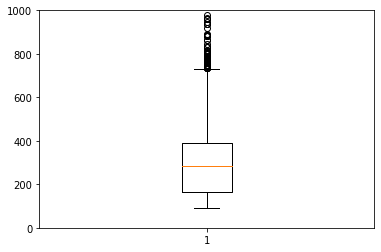

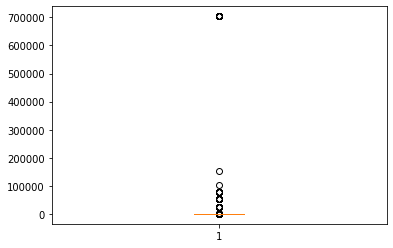

In [156]:
amt = data['order_amount']
fig1 = plt.figure(1)
plt.boxplot(x=amt)
plt.ylim((0, 1000))
fig2 = plt.figure(2)
plt.boxplot(x=amt)

Wow! It appears that there are too many outliers.
This is where our calculation could be going wrong.
Let us dive into the dataset further and see the percentile-order_amt change.

In [76]:
r = np.linspace(0,1,1000)

In [77]:
percentiles = [amt.quantile(i) for i in r]

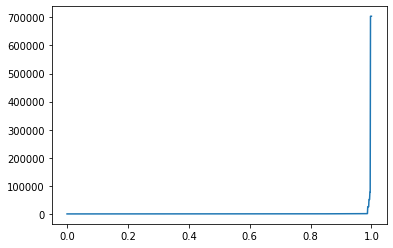

In [78]:
plt.plot(r, percentiles)

Aaha! We see a massive jump in order amounts close to the 95 percentile.
Let us zoom into this a bit further to see whats happening

(0.95, 1.0)

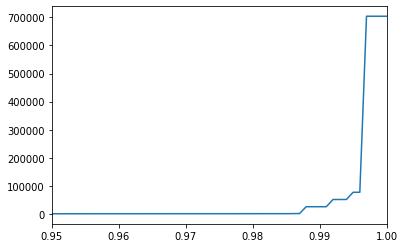

In [79]:
plt.plot(r, percentiles)
plt.xlim((0.95,1))

A jump is observed close to the 99th percentile.
Since this graph does not show the values for lower order amounts, let us change the range.

948.1800000000039

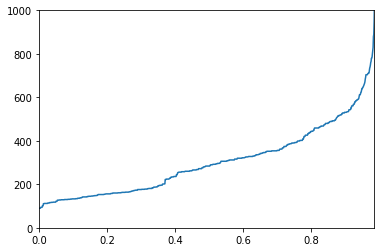

In [183]:
plt.plot(r, percentiles)
plt.xlim((0,0.985))
plt.ylim((0, 1000))
amt.quantile(0.985)

##### We observe that 98.5% of the order amounts are within 1000 dollars, after which the amount increases exponentially
What about the remaining 1.5%?

(0.985, 1.0)

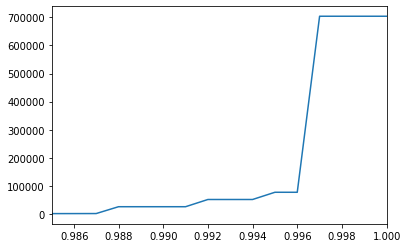

In [105]:
plt.plot(r, percentiles)
plt.xlim((0.985,1))

# Aaaha! this is where the high value for the AOV comes from!
## Now, how could we obtain a more accurate value?
#### 1) We could remove the top 1.5% of the order amounts and calculate the mean there
#### 2) We could calculate the median of the order amounts
#### 3) We could find the IQR (inter-quartile range)
#### 4) We could find z-scores for each order and filter out high values
Let us try all





#### Mean of top 98.5%

In [225]:
amt[amt < amt.quantile(0.985)].mean()

300.52406091370557

Hmmm... seems promising!

#### Median of the dataset

In [174]:
amt.median()

284.0

Not bad!

#### IQR

In [142]:
amt.quantile(0.75) - amt.quantile(0.25)

227.0

A tad bit too low in my opinion!

#### Z Score

In [157]:
data['z_score'] = stats.zscore(amt)

In [170]:
data[abs(data['z_score']) < 3]['order_amount'].mean()

723.2617422721798

Uh oh! That seems to be too large!
This could be because of the large range of values in the dataset

#### I would report the median metric for this dataset. This is because it is more robust and does not need any 
#### data cleaning to get an accurate value (unlike the mean).
### The value of this metric was observed to be 284